&copy;  C. Lázaro, Universidad Politécnica de Valencia, 2015

# Form finding of planar flexible rods (4)

In this notebook we will try to find the pattern which relates end moments and end rotations in the Kirchhoff rod. For this purpose we will restrict ourselves to $-\frac{\mathcal{H}}{F} < 1$, i.e. rods with no end moments at the nodes of the semi-wave.

## 1 Plotting elastica waves

We will first rewrite the code for computing the shape of the elastica.
We need to introduce the new parameter $0 \leq t \leq 2\pi$ in order to be able to smoothly traverse the equilibrium orbit. It is defined in the following way
$$\theta  = -\theta_0 \,\cos t$$
Note that with this definition it will be possible to plot a full elastica wave (with changing moment sign.) 

In [1]:
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def getOrbitPoints(EI, H, F, tI, tJ, nVertex):
    
    t = np.linspace(tI, tJ, nVertex)
    
    if (abs(F) <= H)|(abs(F) < 1.E-8):
        theta0 = np.pi
        theta = -theta0 * np.cos(t)
        
        N = F*np.cos(theta)
        Q = -F*np.sin(theta)
        M = np.zeros(nVertex)
        for i in range(nVertex):
            if (abs(H-N[i]) < 1E-8):
                M[i] = 0.
            else:
                M[i] = +np.sqrt(2*EI*(H - N[i]))
    else:
        theta0 = np.arccos(H/F)
        theta = -theta0 * np.cos(t)
        
        N = F*np.cos(theta)
        Q = -F*np.sin(theta)
        M = np.zeros(nVertex)
        for i in range(nVertex):
            if (abs(H-N[i]) < 1E-8):
                M[i] = 0.
            else:
                if np.remainder(int(np.floor(t[i]/np.pi)), 2) == 0:
                    M[i] = +np.sqrt(2*EI*(H - N[i]))
                else:
                    M[i] = -np.sqrt(2*EI*(H - N[i]))
    
    return t, theta, N, Q, M

In [3]:
EI = 5000.   #kN m^2

rng_H = [-600, 1600, 3600., 7600., 11600]    #kN m/m
rng_F = [-2600., -3100., -3600., -4100., -4600.]   #kN

nVertex = 101

tI = 0
tJ = 2*np.pi

H = rng_H[2]
lst0_N = []
lst0_Q = []
lst0_M = []
for F in rng_F:
    (t, theta, N, Q, M) = getOrbitPoints(EI, H, F, tI, tJ, nVertex)
    lst0_N.append(N)
    lst0_Q.append(Q)
    lst0_M.append(M)

F = rng_F[2]
lst1_N = []
lst1_Q = []
lst1_M = []
for H in rng_H:
    (t, theta, N, Q, M) = getOrbitPoints(EI, H, F, tI, tJ, nVertex)
    lst1_N.append(N)
    lst1_Q.append(Q)
    lst1_M.append(M)

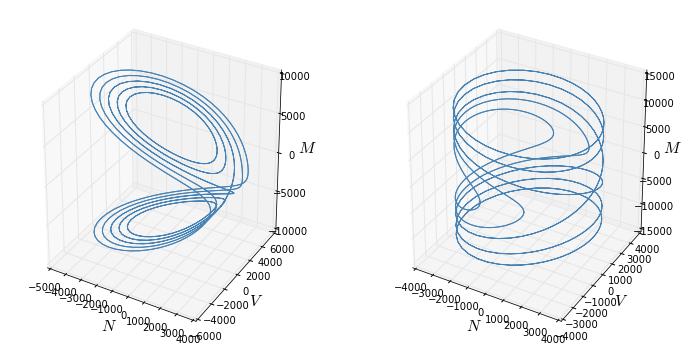

In [5]:
fig = plt.figure(figsize=(12, 6))
font = {'size'   : 16}
ax = fig.add_subplot(1, 2, 1, projection='3d')
for (N, Q, M) in zip(lst0_N, lst0_Q, lst0_M):
    ax.plot(N, Q, M, 'steelblue')
    ax.plot(N, Q, -M, 'steelblue')
ax.set_xlabel('$N$', fontdict=font)
ax.set_ylabel('$V$', fontdict=font)
ax.set_zlabel('$M$', fontdict=font)
        
ax = fig.add_subplot(1, 2, 2, projection='3d')
for (N, Q, M) in zip(lst1_N, lst1_Q, lst1_M):
    ax.plot(N, Q, M, 'steelblue')
    ax.plot(N, Q, -M, 'steelblue')
ax.set_xlabel('$N$', fontdict=font)
ax.set_ylabel('$V$', fontdict=font)
ax.set_zlabel('$M$', fontdict=font)

In [24]:
def computeElastica(theta, Q, M, nEdges, nVertex):
    h = np.zeros(nEdges)
    h[:] = -2*(M[1:] - M[0:-1])/(Q[0:-1] + Q[1:])
    # Cuidado! Para H>= abs(F) y pi< t <=2pi da valores negativos!!!
    # No funciona bien para rangos de t fuera de [0, pi] si H>= abs(F)
    # Corregir!!!
    
    kappa = M / EI
    phi = np.zeros(nVertex-1)
    rotor = np.zeros(nVertex-1) + 1j*np.zeros(nVertex-1)

    phi[0] = theta[0] + np.arctan(h[0]*kappa[0]/2)
    phi[1:] = 2.*np.arctan(kappa[1:-1]*(h[0:-1] + h[1:])/4.) 

    rotor[0] = np.exp(1j*phi[0])
    rotor[1:] = (4./(h[0:-1] + h[1:]) + 1j*kappa[1:-1])/(4./(h[0:-1] + h[1:]) - 1j * kappa[1:-1])
    
    gamma = np.zeros(nVertex) + 1j*np.zeros(nVertex)
    gamma[0] = 0.+0j
    gamma[1] = gamma[0] + h[0]*rotor[0]
    for n in range(1, nVertex-1):
        gamma[n+1] = gamma[n] + h[n]/h[n-1] * (gamma[n] - gamma[n-1]) * rotor[n]
    
    return phi, h, gamma

In [161]:
EI = 5000.
F = -5000.
H = 4750.

nVertex = 101
nEdges = nVertex - 1

tI = 0.*np.pi
tJ = 2.*np.pi

(t, theta, N, Q, M) = getOrbitPoints(EI, H, F, tI, tJ, nVertex)
(phi, h, gamma) = computeElastica(theta, Q, M, nEdges, nVertex)

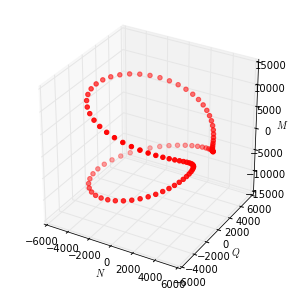

In [162]:
fig = plt.figure(figsize=(5., 5.))

ax = fig.gca(projection='3d')
ax.scatter(N, Q, M, color='r')
ax.set_xlabel('$N$')
ax.set_ylabel('$Q$')
ax.set_zlabel('$M$')

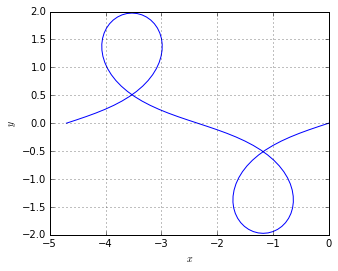

In [163]:
fig = plt.figure(figsize=(5,5))

ax = fig.gca(aspect='equal')
ax.plot(gamma.real, gamma.imag, color='b')
ax.grid()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

## 2 End moments and rotations

We examine now the relation between moment increments and distance between end sections for given bending stiffness, end force and energy density. For that purpose, we recall that
$$ M = \pm \sqrt{2EI (\mathcal{H} - F \cos\theta)}$$
and
$$\theta  = -\theta_0 \,\cos t$$
with
$$\theta_0 = \arccos\frac{\mathcal{H}}{F}$$
We may visualize this relation for a full elastica wave:

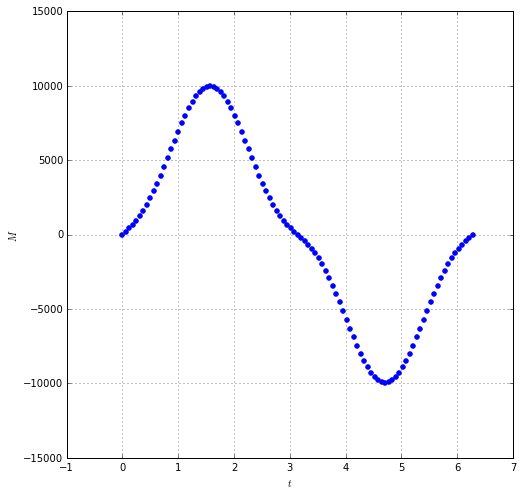

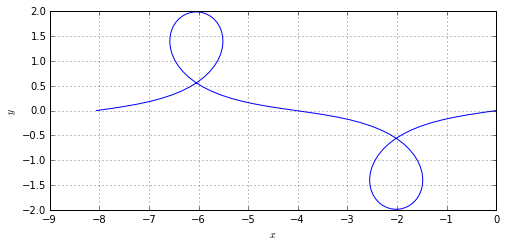

In [164]:
EI = 5000.
F = -5000.
H = 4950.

nVertex = 101
nEdges = nVertex - 1

tI = 0*np.pi
tJ = 2*np.pi

(t, theta, N, Q, M) = getOrbitPoints(EI, H, F, tI, tJ, nVertex)
(phi, h, gamma) = computeElastica(theta, Q, M, nEdges, nVertex)

# Plots
fig, ax0 = plt.subplots(figsize=(8, 8))    
ax0.scatter(t, M, color='b')
ax0.grid()
ax0.set_xlabel(r'$t$')
ax0.set_ylabel(r'$M$')

fig = plt.figure(figsize=(8, 8)) 
ax1 = fig.gca(aspect='equal')
ax1.plot(gamma.real, gamma.imag, color='b')
ax1.grid()
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')

The first expression establishes a explicit relation between end moments and end rotations. We can rearrange the expression to reach the following invariant relation
$$ \frac{M/F}{d_0} = \pm \frac{1}{\pi} \sqrt{2 \,\biggl( \cos\theta - \frac{\mathcal{H}}{F} \biggr)}$$
With $d_0$, critical length of the rod buckling with $F$
$$d_0^2 = -\pi^2 EI / F \;\;\;\;(F < 0)$$
Let's represent it with the help of the parameter $t$.

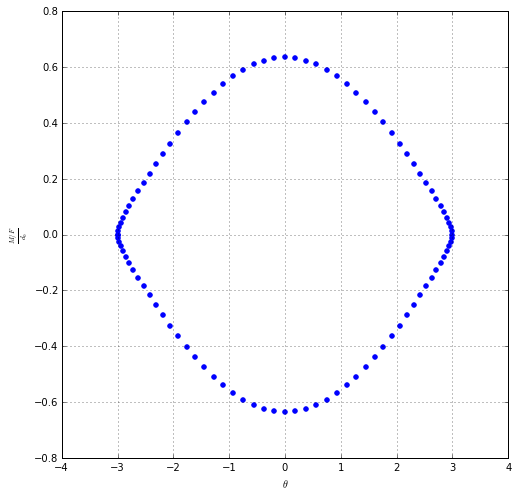

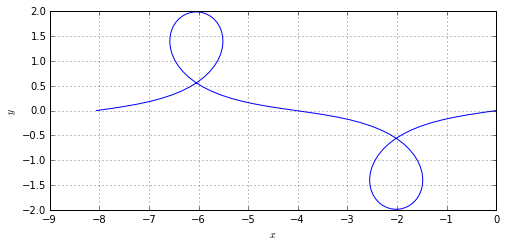

In [198]:
EI = 5000.
F = -5000.
H = 4950.

nVertex = 101
nEdges = nVertex - 1

tI = 0.*np.pi
tJ = 2.*np.pi

(t, theta, N, Q, M) = getOrbitPoints(EI, H, F, tI, tJ, nVertex)
(phi, h, gamma) = computeElastica(theta, Q, M, nEdges, nVertex)

dcrit = np.pi* np.sqrt(-EI / F)

# Plots
fig, ax = plt.subplots(figsize=(8, 8))    
ax.scatter(theta, M/F/dcrit, color='b')
ax.grid()
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\frac{M/F}{d_0}$')


fig = plt.figure(figsize=(8, 8)) 
ax = fig.gca(aspect='equal')
ax.plot(gamma.real, gamma.imag, color='b')
ax.grid()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

We may also plot the adimensional moment in terms of the normalizad arc-length $s/d_{crit}$.

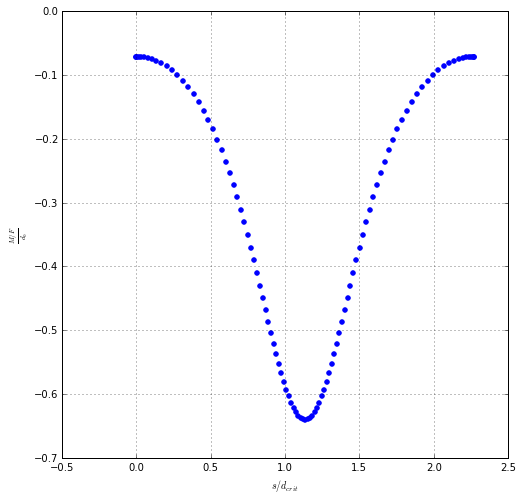

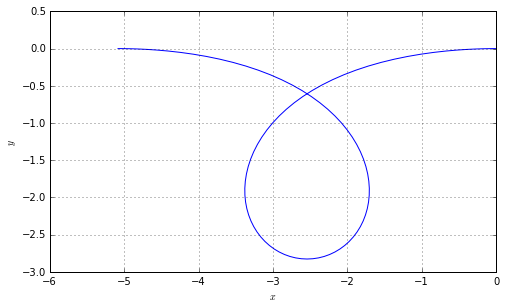

In [167]:
s = np.zeros(nVertex)
for i in range(1, len(s)):
    s[i] = s[i-1] + h[i-1]

fig, ax = plt.subplots(figsize=(8, 8))    
ax.scatter(s/dcrit, M/F/dcrit, color='b')
ax.grid()
ax.set_xlabel(r'$s/d_{crit}$')
ax.set_ylabel(r'$\frac{M/F}{d_0}$')


fig = plt.figure(figsize=(8, 8)) 
ax = fig.gca(aspect='equal')
ax.plot(gamma.real, gamma.imag, color='b')
ax.grid()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

## 3 Further experiments

### 3.1 Travelling along the elastica

In [168]:
EI = 5000.
F = -5000.
H = 4900.

absMmax = np.sqrt(2*EI*(H - F))

nVertex = 201
nEdges = nVertex - 1

N = 10
dist = []
length = []
DeltaX = []
DeltaM = []

for ii in np.linspace(0., 1., 11):
    tI = ii*np.pi
    tJ = (ii+0.5)*np.pi

    (t, theta, N, Q, M) = getOrbitPoints(EI, H, F, tI, tJ, nVertex)
    (phi, h, gamma) = computeElastica(theta, Q, M, nEdges, nVertex)
    
    DeltaM.append(M[nVertex-1]+M[0])
    dist.append(np.absolute(gamma[nVertex-1] - gamma[0]))
    DeltaX.append(gamma[nVertex-1].real - gamma[0].real)
    length.append(np.sum(h))

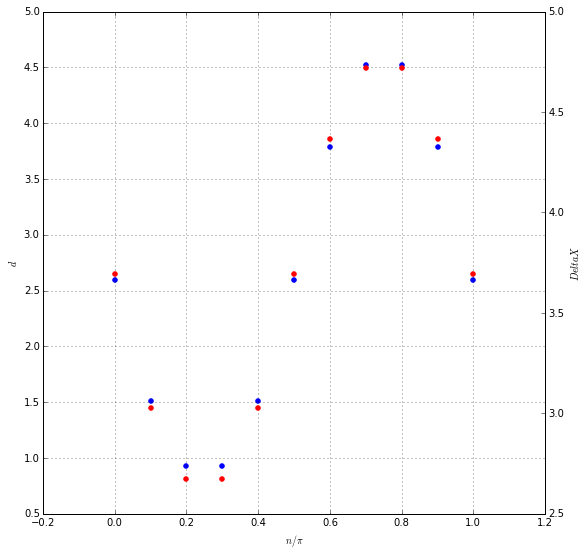

In [169]:
fig, ax0 = plt.subplots(figsize=(9,9))
ax1 = ax0.twinx()

ax0.scatter(np.linspace(0., 1., 11), dist, color='b')
ax0.grid()
ax0.set_xlabel('$n / \pi$')
ax0.set_ylabel('$d$')

ax1.scatter(np.linspace(0., 1., 11), length, color='r')
ax1.set_ylabel('$DeltaX$')

### 3.2 Moment diagrams in terms of different parameters

In [170]:
EI = 5000.
F = -5000.
H = 4900.

nVertex = 201
nEdges = nVertex - 1

tI = 0*np.pi
tJ = 1*np.pi

(t, theta, N, Q, M) = getOrbitPoints(EI, H, F, tI, tJ, nVertex)
(phi, h, gamma) = computeElastica(theta, Q, M, nEdges, nVertex)
s = np.zeros(nVertex)
for i in range(1, len(s)):
    s[i] = s[i-1] + h[i-1]

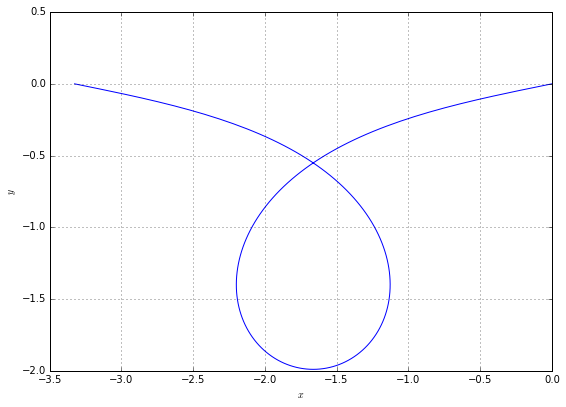

In [171]:
fig = plt.figure(figsize=(9,9))

ax = fig.gca(aspect='equal')
ax.plot(gamma.real, gamma.imag, color='b')
ax.grid()
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

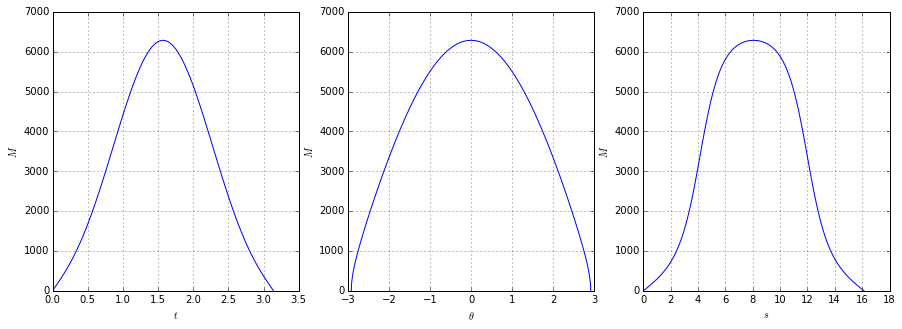

In [196]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 5))    

ax0.plot(t, M, color='b')
ax0.grid()
ax0.set_xlabel(r'$t$')
ax0.set_ylabel(r'$M$')

ax1.plot(theta, M, color='b')
ax1.grid()
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$M$')

ax2.plot(s, M, color='b')
ax2.grid()
ax2.set_xlabel(r'$s$')
ax2.set_ylabel(r'$M$')

### 3.3 Relation between parameter $t$ and arc-length $s$

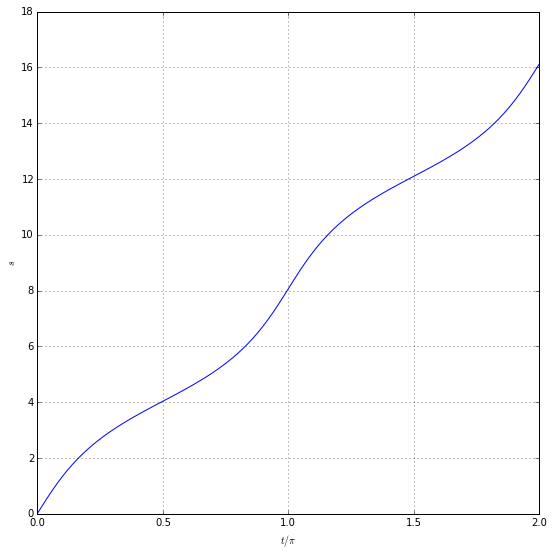

In [173]:
EI = 5000.
F = -5000.
H = 4950.

nVertex = 101
nEdges = nVertex - 1

tI = 0*np.pi
tJ = 2*np.pi

(t, theta, N, Q, M) = getOrbitPoints(EI, H, F, tI, tJ, nVertex)
(phi, h, gamma) = computeElastica(theta, Q, M, nEdges, nVertex)
s = np.zeros(nVertex)
for i in range(1, len(s)):
    s[i] = s[i-1] + h[i-1]

# Plot
fig = plt.figure(figsize=(9,9))

ax = fig.gca()
ax.plot(t/np.pi, s, color='b')
ax.grid()
ax.set_xlabel(r'$t/\pi$')
ax.set_ylabel(r'$s$')

### 3.4 Relation between arc-length $s$ and $d$

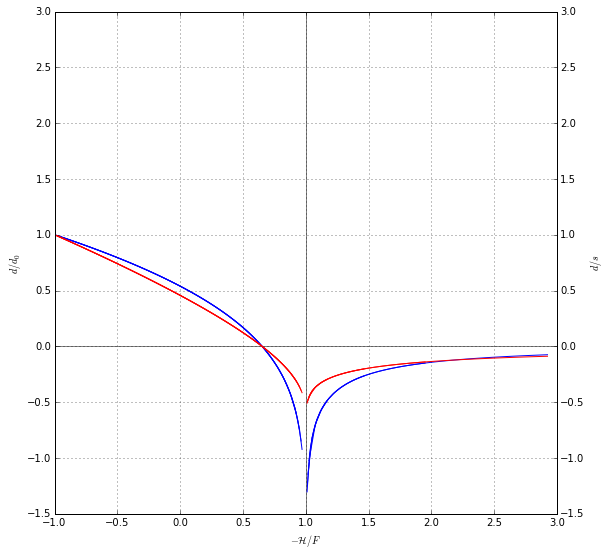

In [194]:
EI = 5000.   #kN m^2

fig, ax0 = plt.subplots(figsize=(9, 9))

ax0.grid()
ax0.axvline(x=1., color=(0.5,0.5,0.5))
ax0.axhline(color=(0.5,0.5,0.5))
ax0.set_xlabel(r'$-\mathcal{H}/F$')
ax0.set_ylim(-1.5, 3.0)
ax0.set_ylabel(r'$d/d_0$')


ax1 = ax0.twinx()
ax1.set_ylim(-1.5, 3.0)
#ax1.set_ylabel(r'$\theta_0/\pi$')
ax1.set_ylabel(r'$d/s$')

F = np.arange(-5000., -1000., 1000.)    #kN

nEdges = 100
nVertex = nEdges + 1

tA = 0*np.pi
tB = 1*np.pi

for k in range(len(F)):
    Hinf = np.arange(F[k]+50., -F[k]-50., 100.)   #kN m/m
    Hsup = np.arange(-F[k]+50., 5950., 100.)
    
    ti = np.zeros((len(Hinf), nVertex))
    thi = np.zeros((len(Hinf), nVertex))
    Ni = np.zeros((len(Hinf), nVertex))
    Qi = np.zeros((len(Hinf), nVertex))
    Mi = np.zeros((len(Hinf), nVertex))
    phiInf = []
    hInf = []
    gammaInf = []
    for i in range(len(Hinf)):
        (ti[i], thi[i], Ni[i], Qi[i], Mi[i]) = getOrbitPoints(EI, Hinf[i], F[k], tA, tB, nVertex)
        (phi, h, gamma) = computeElastica(thi[i], Qi[i], Mi[i], nEdges, nVertex)
        phiInf.append(phi)
        hInf.append(h)
        gammaInf.append(gamma)
            
    ts = np.zeros((len(Hsup), nVertex))
    ths = np.zeros((len(Hsup), nVertex))
    Ns = np.zeros((len(Hsup), nVertex))
    Qs = np.zeros((len(Hsup), nVertex))
    Ms = np.zeros((len(Hsup), nVertex))
    phiSup = []
    hSup = []
    gammaSup = []
    for i in range(len(Hsup)):
        (ts[i], ths[i], Ns[i], Qs[i], Ms[i]) = getOrbitPoints(EI, Hsup[i], F[k], tA, tB, nVertex)
        (phi, h, gamma) = computeElastica(ths[i], Qs[i], Ms[i], nEdges, nVertex)
        phiSup.append(phi)
        hSup.append(h)
        gammaSup.append(gamma)
            
    distInf = np.zeros(len(Hinf))
    phi0Inf = np.zeros(len(Hinf))
    sInf = np.zeros(len(Hinf))
    for i in range(len(Hinf)):
        distInf[i] = gammaInf[i][nVertex-1].real
        phi0Inf[i] = phiInf[i][0]
        sInf[i] = np.sum(hInf[i])
    
    distSup = np.zeros(len(Hsup))
    phi0Sup = np.zeros(len(Hsup))
    sSup = np.zeros(len(Hsup))
    for i in range(len(Hsup)):
        distSup[i] = gammaSup[i][nVertex-1].real
        phi0Sup[i] = phiSup[i][0]
        sSup[i] = np.sum(hSup[i])
        
    dcrit = np.pi*np.sqrt(-EI/F[k])
    
    ax0.plot(-Hinf/F[k], distInf/dcrit, 'b')
    ax0.plot(-Hsup/F[k], distSup/dcrit, 'b')
    
    # ax1.plot(-Hinf/F[k], phi0Inf/np.pi, 'r')
    # ax1.plot(-Hsup/F[k], phi0Sup/np.pi, 'r')
    
    # ax1.plot(-Hinf/F[k], sInf/dcrit, 'r')
    # ax1.plot(-Hsup/F[k], sSup/dcrit, 'r')
    
    ax1.plot(-Hinf/F[k], distInf/sInf, 'r')
    ax1.plot(-Hsup/F[k], distSup/sSup, 'r')

It is remarkable to observe that in the interval $-1 \leq -\mathcal{H}/F \leq 0.7$ the relation between arc-length and end-distance is practically linear. It remains to see which kind of relationship may be obtained by using the exact solution (elliptic integrals), taking into account that the error in the elastica grows near $-\mathcal{H}/F = 1$.